In [1]:
import pandas as pd

In [53]:
import pandas as pd
import glob

path = r'/Users/joe/Code/TwitterTest' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [54]:
# remove tagged types
df = df[df['type'].isnull()]

# remove tweets with RT string
df = df[~df['text'].str.contains('RT')]

In [55]:
# tweet.user.created_at,tweet.geo,tweet.coordinates,tweet.retweet_count,tweet.favorite_count])
    
df = df[['id','created_at', 'text','author.id','author.created_at', 'author.username','author.location','author.public_metrics.followers_count','geo.full_name','public_metrics.like_count','public_metrics.retweet_count']]
df.head()

,id,created_at,text,author.id,author.created_at,author.username,author.location,author.public_metrics.followers_count,geo.full_name,public_metrics.like_count,public_metrics.retweet_count
2,1082788995535462400,2019-01-08T23:59:48.000Z,Blessing be upon @GreggsOfficial for their Veg...,18679901,2009-01-06T15:40:17.000Z,DavidGArnold,london,56989,NaN,26,1
3,1082788984542027776,2019-01-08T23:59:45.000Z,The Most Underrated Podcast w/ @DalPaolantonio...,197307558,2010-10-01T04:24:27.000Z,oMgitsTTF,A Mile Higher Than The Rest...,2661,NaN,18,4
7,1082788970411499520,2019-01-08T23:59:42.000Z,@VeganBlogger78 @Vegansorrel @VeganOlive1 @WTe...,64096842,2009-08-09T02:53:08.000Z,veggiesnottm,"Nottingham, UK",4676,NaN,4,1
8,1082788955362377728,2019-01-08T23:59:38.000Z,making homemade pull-apart vegan cinnamon roll...,381268670,2011-09-28T01:25:31.000Z,glowyaquarius,Eden,13577,NaN,49,0
12,1082788946810150912,2019-01-08T23:59:36.000Z,@Maolfarmiona @Fluffy_Moos Love a vegan cow!,297887271,2011-05-13T09:01:47.000Z,RareBreedsScot,NE Scotland,824,NaN,0,0


In [85]:
# sort by date
df['created_at'] =pd.to_datetime(df.created_at)
df.sort_values(by='created_at')
df = df.reset_index()

In [75]:
# sentiment analysis
import nltk
nltk.download([
    "vader_lexicon",
])
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(string):
    return sia.polarity_scores(string)['compound']

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/joe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [77]:
df['sentiment'] = df['text'].apply(get_sentiment)
df.head()

,id,created_at,text,author.id,author.created_at,author.username,author.location,author.public_metrics.followers_count,geo.full_name,public_metrics.like_count,public_metrics.retweet_count,sentiment
2,1082788995535462400,2019-01-08 23:59:48+00:00,Blessing be upon @GreggsOfficial for their Veg...,18679901,2009-01-06T15:40:17.000Z,DavidGArnold,london,56989,NaN,26,1,0.7906
3,1082788984542027776,2019-01-08 23:59:45+00:00,The Most Underrated Podcast w/ @DalPaolantonio...,197307558,2010-10-01T04:24:27.000Z,oMgitsTTF,A Mile Higher Than The Rest...,2661,NaN,18,4,0.6351
7,1082788970411499520,2019-01-08 23:59:42+00:00,@VeganBlogger78 @Vegansorrel @VeganOlive1 @WTe...,64096842,2009-08-09T02:53:08.000Z,veggiesnottm,"Nottingham, UK",4676,NaN,4,1,0.0000
8,1082788955362377728,2019-01-08 23:59:38+00:00,making homemade pull-apart vegan cinnamon roll...,381268670,2011-09-28T01:25:31.000Z,glowyaquarius,Eden,13577,NaN,49,0,0.0000
12,1082788946810150912,2019-01-08 23:59:36+00:00,@Maolfarmiona @Fluffy_Moos Love a vegan cow!,297887271,2011-05-13T09:01:47.000Z,RareBreedsScot,NE Scotland,824,NaN,0,0,0.6696


<AxesSubplot:ylabel='Frequency'>

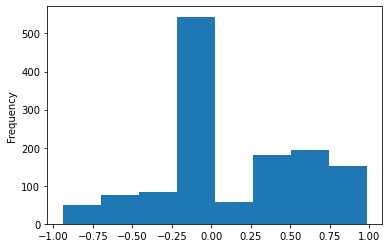

In [81]:
df.sentiment.plot(kind='hist',bins=8)

<AxesSubplot:>

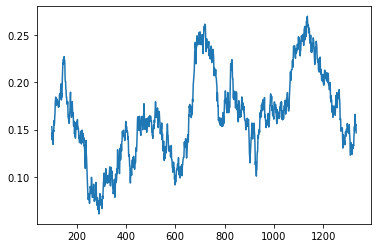

In [87]:
df['sentiment'].rolling(100).mean().plot()

In [88]:
# output data
df.to_csv('output.csv', index=False)